In [55]:
import numpy    as np
from numpy.testing._private.utils import decorate_methods
import pandas   as pd
import seaborn  as sn
import matplotlib.pyplot as plt
import sklearn  as skl
import time
from matplotlib.pyplot import figure

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

from sklearn.tree          import DecisionTreeRegressor
from sklearn.ensemble      import RandomForestRegressor
from sklearn.ensemble      import ExtraTreesRegressor
from sklearn.ensemble      import AdaBoostRegressor
from sklearn.ensemble      import GradientBoostingRegressor
from xgboost               import XGBRegressor
from lightgbm              import LGBMRegressor
from catboost              import CatBoostRegressor

In [56]:
data = pd.read_csv('D:/Machine_Learning/Machine_Learning/11. Data Enhancement/data/london_merged.csv')

In [57]:
data.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [59]:
print ("Unique values are:\n",data.nunique())

Unique values are:
 timestamp       17414
cnt              3781
t1                 73
t2                 82
hum               143
wind_speed        103
weather_code        7
is_holiday          2
is_weekend          2
season              4
dtype: int64


In [60]:
data.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [61]:
np.random.seed(0)

In [62]:
data['year'] = data['timestamp'].apply(lambda row: row[:4])
data['month'] = data['timestamp'].apply(lambda row: row.split('-')[1][:2])
data['hour'] = data['timestamp'].apply(lambda row: row.split(':')[0][-2:])
data['new'] = data['t1']*data['t2']

In [63]:
data.hour.unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [64]:
data.year.unique()

array(['2015', '2016', '2017'], dtype=object)

In [65]:
data.drop('timestamp', axis=1, inplace=True)

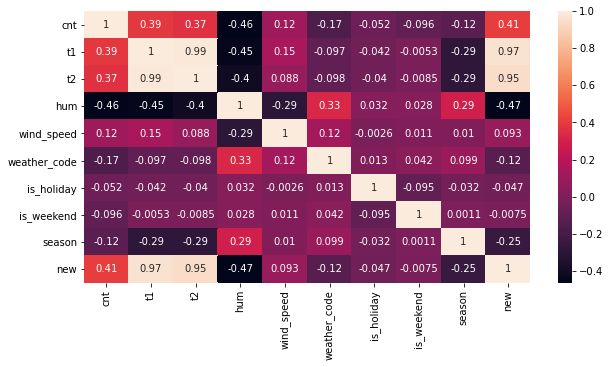

In [66]:
corrMatrix=data.corr()
figure(figsize=(10,5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [67]:
Weather=data["season"].value_counts().reset_index()
Weather.columns=["Weather Type","Count"]
Weather

,Weather Type,Count
0,0.0,4394
1,1.0,4387
2,3.0,4330
3,2.0,4303


<AxesSubplot:xlabel='season', ylabel='t1'>

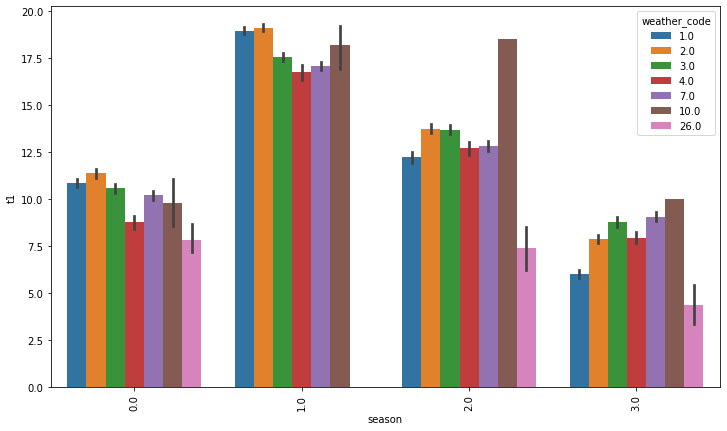

In [68]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sn.barplot(data=data, x="season", y="t1",hue="weather_code")

<AxesSubplot:xlabel='season', ylabel='t2'>

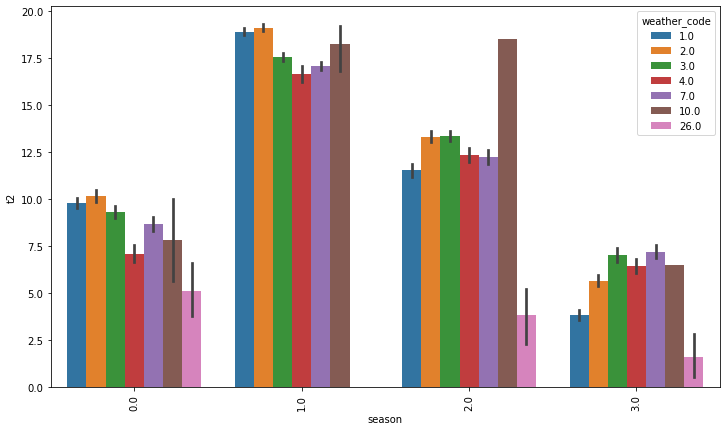

In [69]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sn.barplot(data=data, x="season", y="t2",hue="weather_code")

<AxesSubplot:xlabel='season', ylabel='wind_speed'>

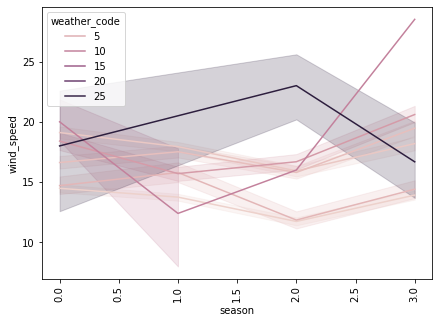

In [70]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sn.lineplot(data=data, x="season", y="wind_speed", hue="weather_code")

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.war

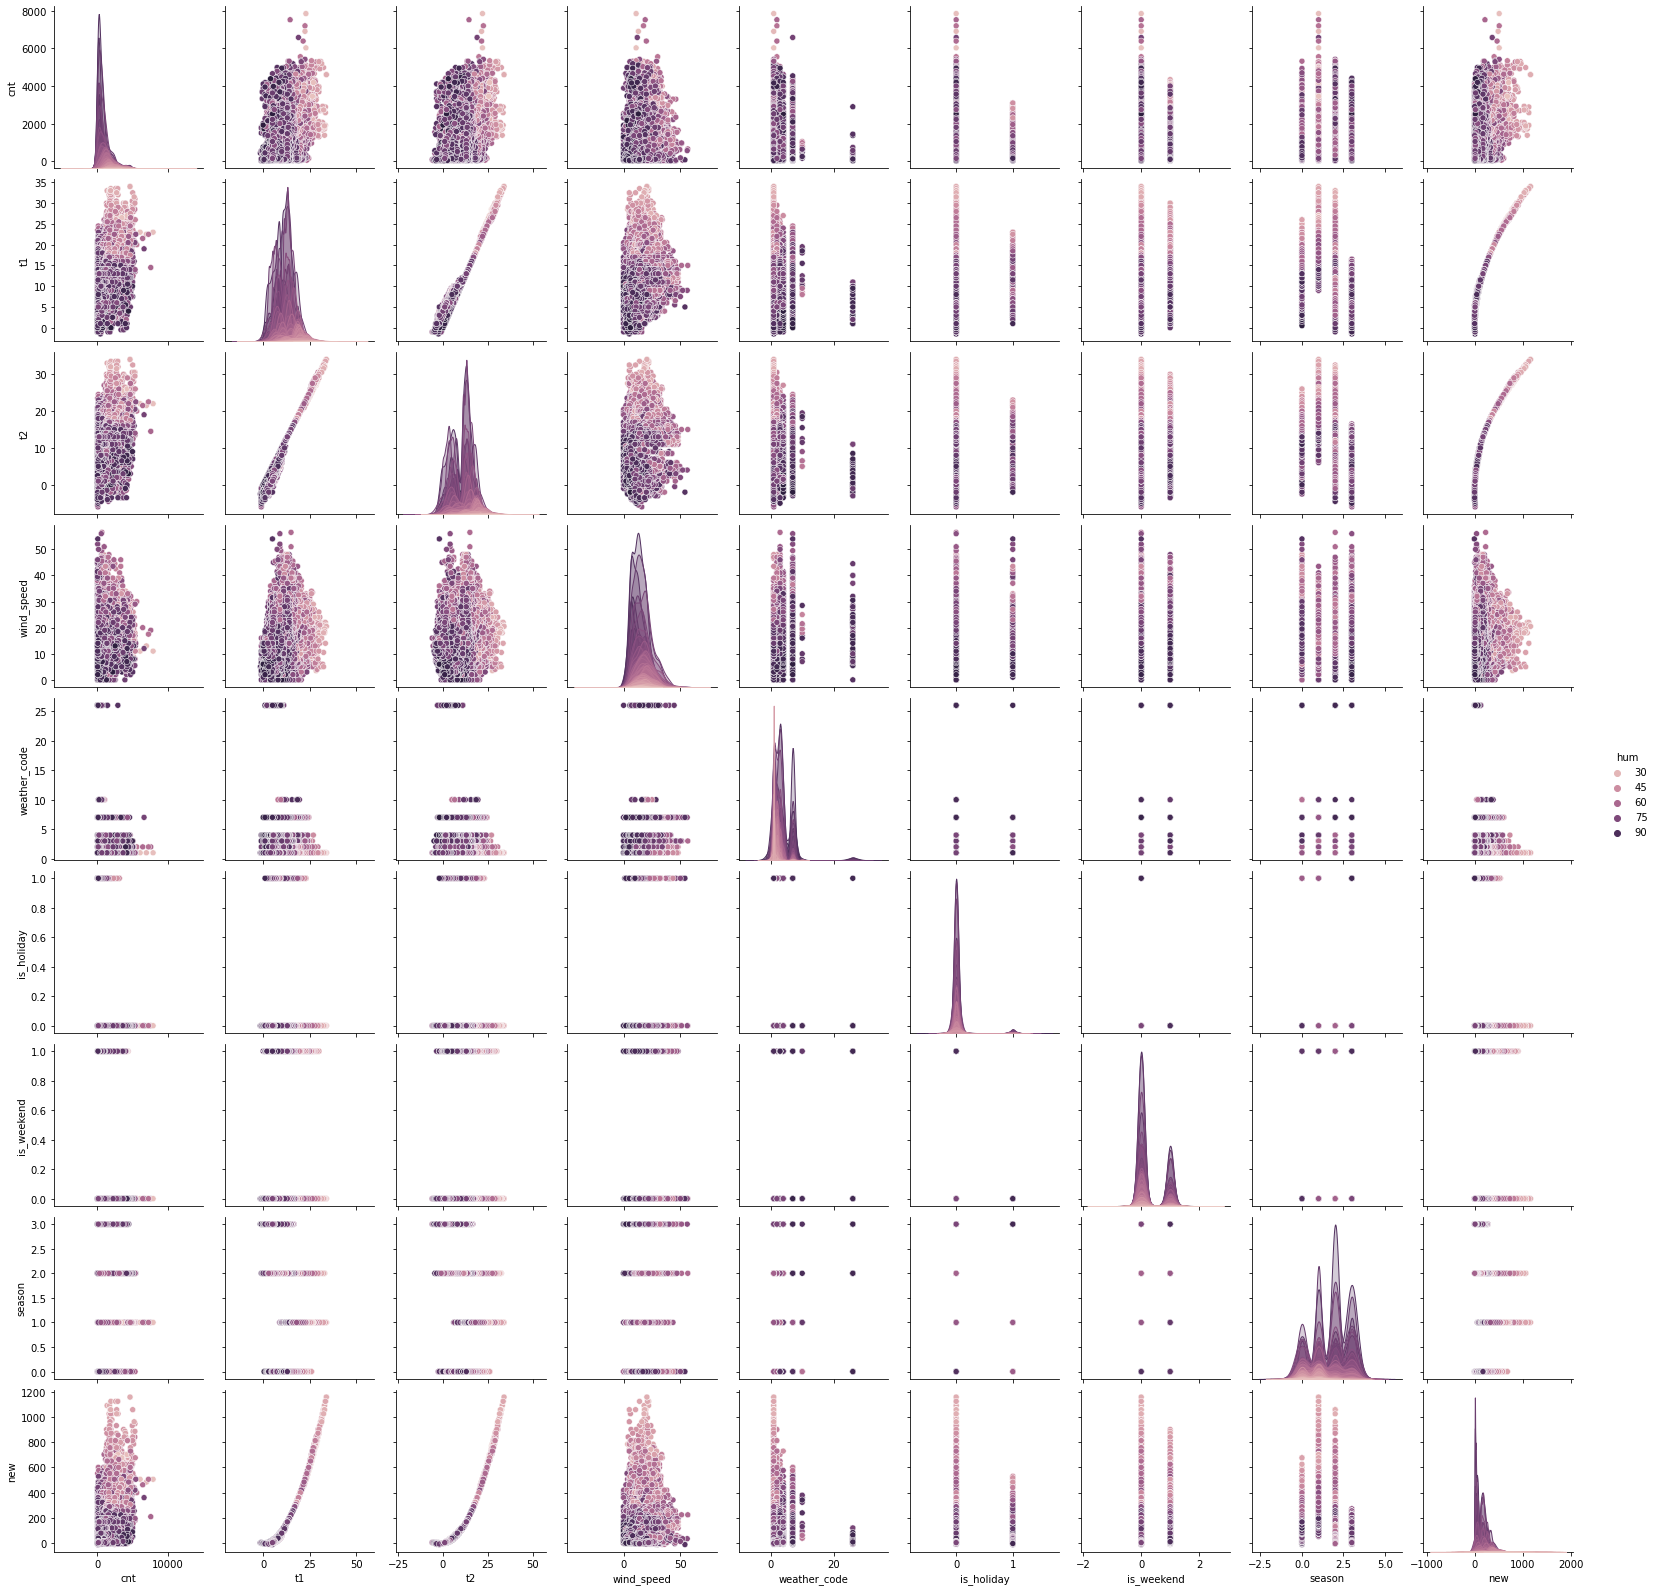

In [71]:
sn.pairplot(data,hue="hum")

In [45]:
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour,new
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,01,00,6.00
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,01,01,7.50
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,01,02,6.25
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,01,03,4.00
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,01,04,0.00


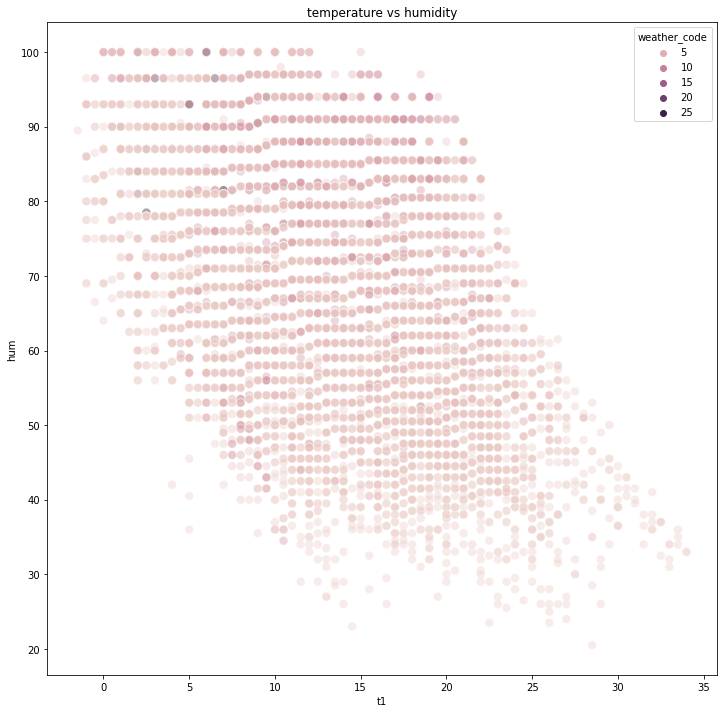

In [46]:
plt.figure(figsize = (12,12))
plt.title('temperature vs humidity')
sn.scatterplot(x=data.iloc[:,1], y=data.iloc[:,3], hue=data.iloc[:,5], s=75, alpha = 0.4)
plt.show()

In [47]:
def data_enhancement(data):
    
    gen_data = data
    
    for season in data['season'].unique():
        seasonal_data =  gen_data[gen_data['season'] == season]
        hum_std = seasonal_data['hum'].std()
        wind_speed_std = seasonal_data['wind_speed'].std()
        t1_std = seasonal_data['t1'].std()
        t2_std = seasonal_data['t2'].std()
        
        for i in gen_data[gen_data['season'] == season].index:
            if np.random.randint(2) == 1:
                gen_data['hum'].values[i] += hum_std/10
            else:
                gen_data['hum'].values[i] -= hum_std/10
                
            if np.random.randint(2) == 1:
                gen_data['wind_speed'].values[i] += wind_speed_std/10
            else:
                gen_data['wind_speed'].values[i] -= wind_speed_std/10
                
            if np.random.randint(2) == 1:
                gen_data['t1'].values[i] += t1_std/10
            else:
                gen_data['t1'].values[i] -= t1_std/10
                
            if np.random.randint(2) == 1:
                gen_data['t2'].values[i] += t2_std/10
            else:
                gen_data['t2'].values[i] -= t2_std/10

    return gen_data

print(data.head(3))
gen = data_enhancement(data)
print(gen.head(3) )

   cnt   t1   t2   hum  wind_speed  weather_code  is_holiday  is_weekend  \
0  182  3.0  2.0  93.0         6.0           3.0         0.0         1.0   
1  138  3.0  2.5  93.0         5.0           1.0         0.0         1.0   
2  134  2.5  2.5  96.5         0.0           1.0         0.0         1.0   

   season  year month hour   new  
0     3.0  2015    01   00  6.00  
1     3.0  2015    01   01  7.50  
2     3.0  2015    01   02  6.25  
   cnt        t1       t2        hum  wind_speed  weather_code  is_holiday  \
0  182  3.379372  1.51169  91.910483    6.890895           3.0         0.0   
1  138  3.379372  2.98831  94.089517    5.890895           1.0         0.0   
2  134  2.879372  2.01169  97.589517    0.890895           1.0         0.0   

   is_weekend  season  year month hour   new  
0         1.0     3.0  2015    01   00  6.00  
1         1.0     3.0  2015    01   01  7.50  
2         1.0     3.0  2015    01   02  6.25  


In [49]:
#final_data = data
y = data['cnt']
x = data.drop(['cnt'], axis=1)


cat_vars = ['season','is_weekend','is_holiday','year','month','weather_code']
num_vars = ['t1','t2','hum','wind_speed','new']


x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y,
                                    test_size=0.2,
                                    random_state=0 ) # Recommended for reproducibility

In [54]:
rang = abs(y_train.max()) + abs(y_train.min())

num_4_treeModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value=-9999)),
])

cat_4_treeModels = pipeline.Pipeline(steps=[
    ('imputer', impute.SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', preprocessing.OrdinalEncoder()) # handle_unknown='ignore' ONLY IN VERSION 0.24
])

tree_prepro = compose.ColumnTransformer(transformers=[
    ('num', num_4_treeModels, num_vars),
    ('cat', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars

tree_classifiers = {
  "Decision Tree": DecisionTreeRegressor(),
  "Extra Trees":   ExtraTreesRegressor(n_estimators=100),
  "Random Forest": RandomForestRegressor(n_estimators=100),
  "AdaBoost":      AdaBoostRegressor(n_estimators=100),
  "Skl GBM":       GradientBoostingRegressor(n_estimators=100),
  "XGBoost":       XGBRegressor(n_estimators=100),
  "LightGBM":      LGBMRegressor(n_estimators=100),
  "CatBoost":      CatBoostRegressor(n_estimators=100),
}
### END SOLUTIONv

tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}

results = pd.DataFrame({'Model': [], 'MSE': [], 'MAB': [], " % error": [], 'Time': []})

for model_name, model in tree_classifiers.items():
    
    start_time = time.time()
    model.fit(x_train, y_train)
    total_time = time.time() - start_time
        
    pred = model.predict(x_val)
    
    results = results.append({"Model":    model_name,
                              "MSE": metrics.mean_squared_error(y_val, pred),
                              "MAB": metrics.mean_absolute_error(y_val, pred),
                              " % error": metrics.mean_squared_error(y_val, pred) / rang,
                              "Time":     total_time},
                              ignore_index=True)
### END SOLUTION


results_ord = results.sort_values(by=['MSE'], ascending=True, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['MSE', 'MAE'], vmin=0, vmax=100, color='#5fba7d')

print(results_ord)


print(y_train.max())
print(y_train.min())


Learning rate set to 0.403579
0:	learn: 982.9415411	total: 16.6ms	remaining: 1.65s
1:	learn: 938.1546620	total: 22.2ms	remaining: 1.08s
2:	learn: 910.8434718	total: 28.7ms	remaining: 929ms
3:	learn: 899.5449568	total: 33.8ms	remaining: 812ms
4:	learn: 891.6957310	total: 38.2ms	remaining: 726ms
5:	learn: 887.3500547	total: 42.6ms	remaining: 667ms
6:	learn: 882.5591757	total: 46.6ms	remaining: 619ms
7:	learn: 879.1945235	total: 50.6ms	remaining: 582ms
8:	learn: 876.5697942	total: 53.4ms	remaining: 540ms
9:	learn: 874.3269080	total: 58.6ms	remaining: 527ms
10:	learn: 872.6563917	total: 61ms	remaining: 493ms
11:	learn: 871.5543475	total: 63.5ms	remaining: 466ms
12:	learn: 870.3869199	total: 65.9ms	remaining: 441ms
13:	learn: 869.6707164	total: 68.1ms	remaining: 419ms
14:	learn: 867.2578504	total: 71.9ms	remaining: 408ms
15:	learn: 865.7530898	total: 74.5ms	remaining: 391ms
16:	learn: 864.2402973	total: 76.8ms	remaining: 375ms
17:	learn: 861.6299286	total: 79.1ms	remaining: 360ms
18:	learn: